<a href="https://colab.research.google.com/github/sanath8107/strategies/blob/main/mean_reversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MEAN REVERSION

This algorithm works on the assumption that there is an underlying trend in the stock prices and the prices have to return to it(in this case average). If the price goes above a certain amount than the average then the sell signal is raised and if it goes below a certain amount then it is a buy signal.

***There is a flaw in the code on to how to decide the stock value to which the trend is assumed to move around.***

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Yes.csv to Yes.csv


In [8]:
data = pd.read_csv('Yes.csv')
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2017-01-02,1160.60,1162.00,1131.30,1144.00,1144.65,1568032.0,17935.77
1,2017-01-03,1145.00,1172.70,1140.45,1166.00,1162.90,1750236.0,20348.56
2,2017-01-04,1166.00,1171.90,1158.30,1162.20,1163.15,1228400.0,14312.28
3,2017-01-05,1170.10,1219.40,1168.40,1209.45,1210.20,3710625.0,44562.68
4,2017-01-06,1215.00,1251.90,1215.00,1249.50,1246.75,3745181.0,46482.94
...,...,...,...,...,...,...,...,...
243,2017-12-22,310.50,313.50,308.70,309.95,310.15,7895699.0,24560.27
244,2017-12-26,310.50,317.90,310.20,315.30,315.50,9269961.0,29172.96
245,2017-12-27,316.65,318.95,313.35,313.90,315.15,8912485.0,28212.27
246,2017-12-28,314.00,316.00,311.80,312.75,313.50,7927990.0,24893.25


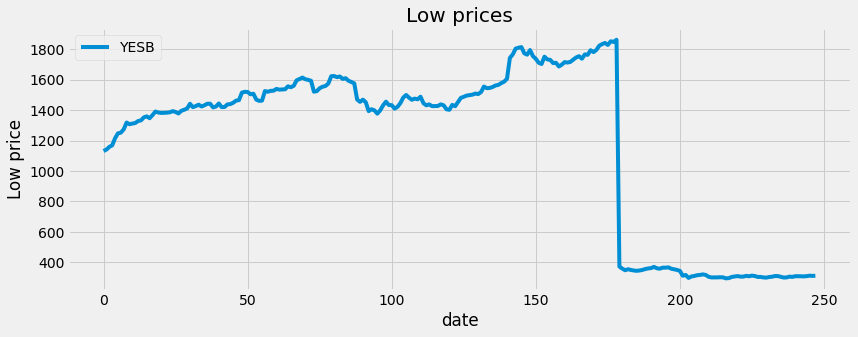

In [9]:
plt.figure(figsize = (12.5,4.5))
plt.plot(data['Low'],label ='YESB')
plt.title("Low prices")
plt.xlabel("date")
plt.ylabel("Low price")
plt.legend(loc = "upper left")
plt.show()

In [10]:
pruned_data = pd.DataFrame()
pruned_data['Low'] = data['Low']

In [27]:
#here we consider the threshold to be 3 percent of the average
def buy_sell(data):
  sum_till_now,mean_till_now,number_of_days = 0,0,0
  Buy = []
  Sell = []
  average = []
  flag = -1
  for i in range(len(data)):
    sum_till_now +=  pruned_data['Low'][number_of_days]
    number_of_days += 1
    mean_till_now = sum_till_now/number_of_days
    average.append(mean_till_now)
    if data['Low'][i]< mean_till_now*0.97:
      if flag != 0:
        flag = 0
        Buy.append(data['Low'][i])
        Sell.append(np.nan)
      else:
        Buy.append(np.nan)
        Sell.append(np.nan)
    elif data['Low'][i]>mean_till_now*1.03:
      if flag != 1:
        Sell.append(data['Low'][i])
        Buy.append(np.nan)
        flag = 1
      else:
        Buy.append(np.nan)
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  return (Buy,Sell,average)

In [28]:
buysell = buy_sell(pruned_data)
pruned_data['Buy'] = buysell[0]
pruned_data['Sell'] = buysell[1]
pruned_data['mean'] = buysell[2]
pruned_data

,Low,Buy,Sell,mean
0,1131.30,NaN,NaN,1131.300000
1,1140.45,NaN,NaN,1135.875000
2,1158.30,NaN,NaN,1143.350000
3,1168.40,NaN,NaN,1149.612500
4,1215.00,NaN,1215.0,1162.690000
...,...,...,...,...
243,308.70,NaN,NaN,1203.313934
244,310.20,NaN,NaN,1199.668571
245,313.35,NaN,NaN,1196.065650
246,311.80,NaN,NaN,1192.485628


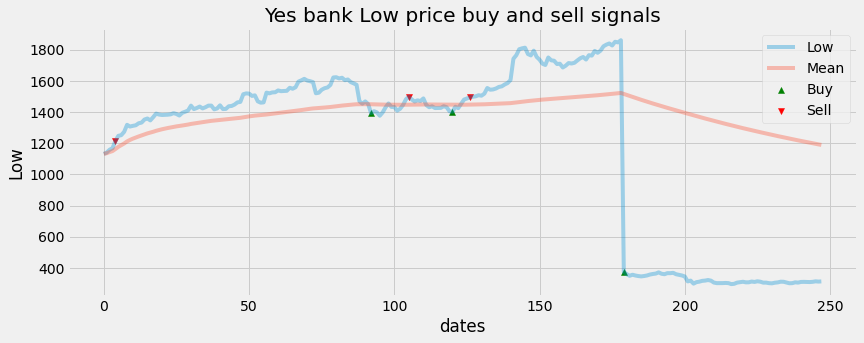

In [29]:
plt.figure(figsize = (12.6,4.6))
plt.plot(pruned_data['Low'],label = 'Low',alpha = 0.35)
plt.plot(pruned_data['mean'],label= 'Mean',alpha = 0.35)
plt.scatter(data.index ,pruned_data['Buy'],label = 'Buy',marker = '^',color = 'green')
plt.scatter(data.index,pruned_data['Sell'],label = 'Sell',marker = 'v',color = 'red')
plt.title('Yes bank Low price buy and sell signals')
plt.xlabel('dates')
plt.ylabel('Low')
plt.legend(loc='upper right')
plt.show()